In [2]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Путь к датасету (обновите его в соответствии с вашей структурой Kaggle notebook)
dataset_path = "../input/flowers-recognition/flowers"

# Получаем список всех файлов изображений
all_images = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            all_images.append(os.path.join(root, file))

# Выбираем 10 случайных изображений
random_images = random.sample(all_images, 10)

# Отображаем изображения
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(random_images, 1):
    img = Image.open(img_path)
    plt.subplot(5, 2, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Разрешение: {img.size[0]}x{img.size[1]}")

plt.tight_layout()
plt.show()

ValueError: Sample larger than population or is negative

In [ ]:
import os
from PIL import Image

# Путь к датасету (обновите его в соответствии с вашей структурой Kaggle notebook)
dataset_path = "../input/flowers-recognition/flowers"

# Инициализация переменных для суммирования размеров
total_width = 0
total_height = 0
image_count = 0

# Обход всех изображений в датасете
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    width, height = img.size
                    total_width += width
                    total_height += height
                    image_count += 1
            except Exception as e:
                print(f"Ошибка при обработке {image_path}: {e}")

# Вычисление среднего разрешения
if image_count > 0:
    average_width = total_width / image_count
    average_height = total_height / image_count
    print(f"Обработано изображений: {image_count}")
    print(f"Среднее разрешение:")
    print(f"Ширина: {average_width:.2f} пикселей")
    print(f"Высота: {average_height:.2f} пикселей")
else:
    print("Изображения не найдены")

Обработано изображений: 4317
Среднее разрешение:
Ширина: 338.38 пикселей
Высота: 253.07 пикселей


Обработано и сохранено изображение 1/600
Обработано и сохранено изображение 2/600
Обработано и сохранено изображение 3/600
Обработано и сохранено изображение 4/600
Обработано и сохранено изображение 5/600
Обработано и сохранено изображение 6/600
Обработано и сохранено изображение 7/600
Обработано и сохранено изображение 8/600
Обработано и сохранено изображение 9/600
Обработано и сохранено изображение 10/600
Обработано и сохранено изображение 11/600
Обработано и сохранено изображение 12/600
Обработано и сохранено изображение 13/600
Обработано и сохранено изображение 14/600
Обработано и сохранено изображение 15/600
Обработано и сохранено изображение 16/600
Обработано и сохранено изображение 17/600
Обработано и сохранено изображение 18/600
Обработано и сохранено изображение 19/600
Обработано и сохранено изображение 20/600
Обработано и сохранено изображение 21/600
Обработано и сохранено изображение 22/600
Обработано и сохранено изображение 23/600
Обработано и сохранено изображение 24/600
О

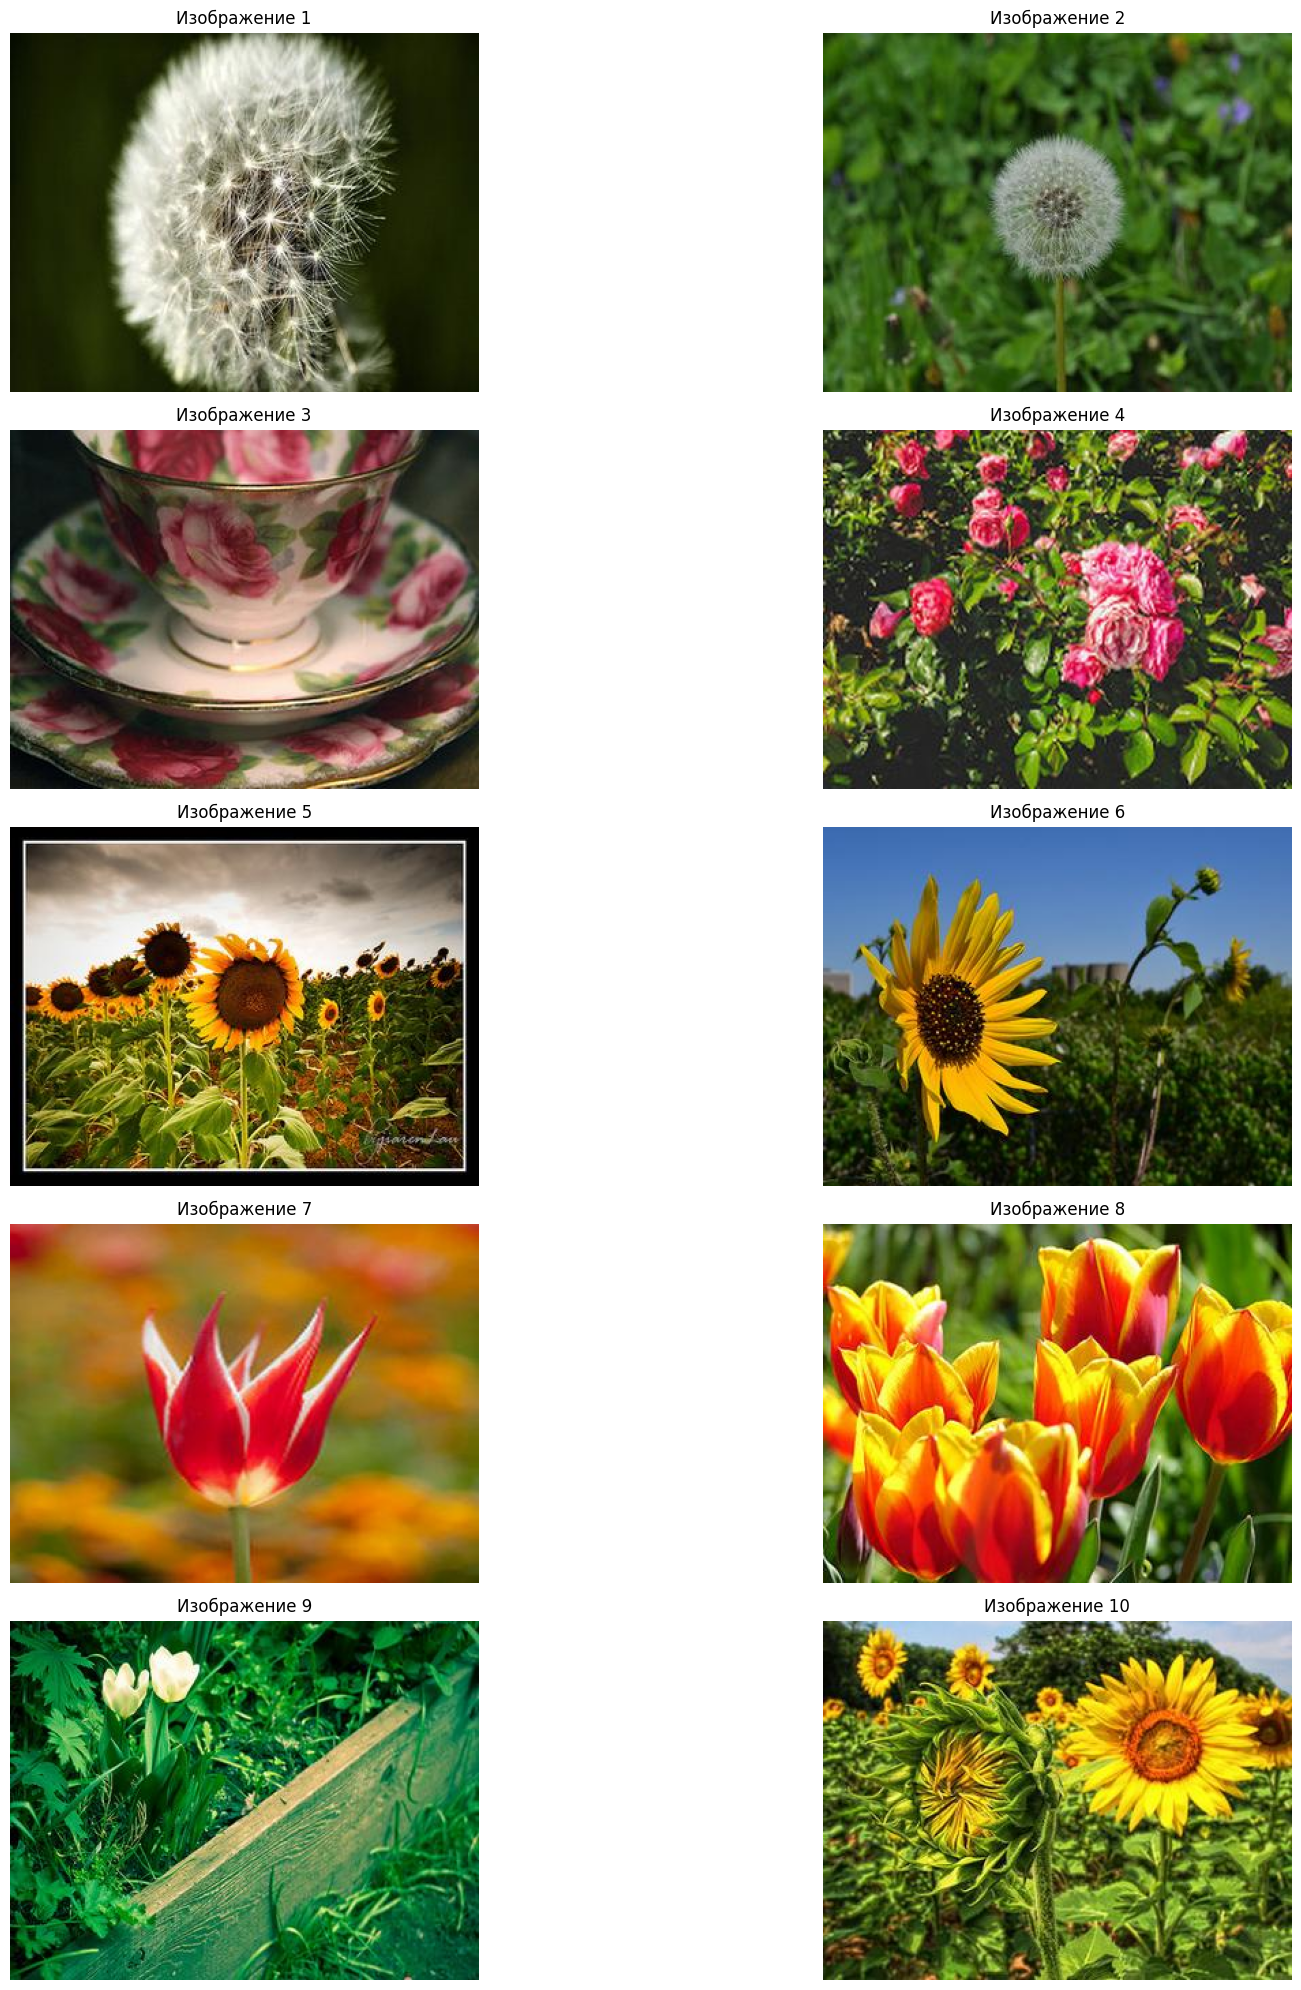

Всего обработано и сохранено изображений: 600
Изображения сохранены в папке: ./output


In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Путь к датасету (обновите его в соответствии с вашей структурой Kaggle notebook)
dataset_path = "../input/flowers-recognition/flowers"

# Путь для сохранения обработанных изображений
output_path = "./output"
os.makedirs(output_path, exist_ok=True)

# Новые размеры для изображений
new_width = 344
new_height = 264

# Получаем список всех файлов изображений
all_images = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            all_images.append(os.path.join(root, file))

# Выбираем 600 случайных изображений (или все, если их меньше 600)
num_images = min(600, len(all_images))
random_images = random.sample(all_images, num_images)

# Обрабатываем и сохраняем изображения
for i, img_path in enumerate(random_images):
    try:
        with Image.open(img_path) as img:
            # Изменяем размер изображения
            resized_img = img.resize((new_width, new_height), Image.LANCZOS)
            
            # Сохраняем изображение
            output_filename = f"resized_image_{i+1}.jpg"
            output_filepath = os.path.join(output_path, output_filename)
            resized_img.save(output_filepath, "JPEG")
            
            print(f"Обработано и сохранено изображение {i+1}/{num_images}")
    except Exception as e:
        print(f"Ошибка при обработке {img_path}: {e}")

# Отображаем первые 10 обработанных изображений
plt.figure(figsize=(20, 20))
for i in range(min(10, num_images)):
    img_path = os.path.join(output_path, f"resized_image_{i+1}.jpg")
    img = Image.open(img_path)
    plt.subplot(5, 2, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Изображение {i+1}")

plt.tight_layout()
plt.show()

print(f"Всего обработано и сохранено изображений: {num_images}")
print(f"Изображения сохранены в папке: {output_path}")

In [ ]:
import random
import numpy as np
from PIL import Image
import math, scipy.fftpack

# Русские буквы, которые мы будем отображать в диапазон ASCII от 128 до 159
russian_to_ascii = {
    'А': 128, 'Б': 129, 'В': 130, 'Г': 131, 'Д': 132, 'Е': 133, 'Ж': 134, 'З': 135,
    'И': 136, 'Й': 137, 'К': 138, 'Л': 139, 'М': 140, 'Н': 141, 'О': 142, 'П': 143,
    'Р': 144, 'С': 145, 'Т': 146, 'У': 147, 'Ф': 148, 'Х': 149, 'Ц': 150, 'Ч': 151,
    'Ш': 152, 'Щ': 153, 'Ъ': 154, 'Ы': 155, 'Ь': 156, 'Э': 157, 'Ю': 158, 'Я': 159,
    'а': 128, 'б': 129, 'в': 130, 'г': 131, 'д': 132, 'е': 133, 'ж': 134, 'з': 135,
    'и': 136, 'й': 137, 'к': 138, 'л': 139, 'м': 140, 'н': 141, 'о': 142, 'п': 143,
    'р': 144, 'с': 145, 'т': 146, 'у': 147, 'ф': 148, 'х': 149, 'ц': 150, 'ч': 151,
    'ш': 152, 'щ': 153, 'ъ': 154, 'ы': 155, 'ь': 156, 'э': 157, 'ю': 158, 'я': 159
}

ascii_to_russian = {v: k for k, v in russian_to_ascii.items()}

def text_to_bits(text):
    bits = []
    for char in text:
        # Если символ русский, преобразуем его через нашу таблицу, иначе берем ASCII-код
        if char in russian_to_ascii:
            bits.append(format(russian_to_ascii[char], '08b'))
        else:
            bits.append(format(ord(char), '08b'))
    return ''.join(bits)


def bits_to_text(bits):
    chars = []
    for i in range(0, len(bits), 8):
        byte = bits[i:i+8]
        ascii_code = int(byte, 2)
        # Если код находится в диапазоне 128-159, это русская буква
        if 128 <= ascii_code <= 159:
            chars.append(ascii_to_russian[ascii_code])
        else:
            chars.append(chr(ascii_code))
    return ''.join(chars)


def dct2(block):
    return scipy.fftpack.dct(scipy.fftpack.dct(block.T, norm='ortho').T, norm='ortho')

def idct2(block):
    return scipy.fftpack.idct(scipy.fftpack.idct(block.T, norm='ortho').T, norm='ortho')

def embed_message(image_path, output_path, message, alpha, seed_key=42):
    # Open image and convert to YCbCr
    img = Image.open(image_path).convert('YCbCr')
    img_array = np.array(img)

    # Convert message to bits
    message_bits = text_to_bits(message)
    bits_count = len(message_bits)

    random.seed(seed_key)
    
    all_indexes = [(i, j, (random.randint(0, 7), random.randint(0, 7))) for i in range(0, img_array.shape[0], 8) for j in range(0, img_array.shape[1], 8)]
    
    random.shuffle(all_indexes)
    
    # Embed bits into DCT coefficients
    dct_coef_const = (5,2)
    bit_index = 0
    for i, j, dct_random_indexes in all_indexes:
        if bit_index >= bits_count:
            break
        
        block = img_array[i:i+8, j:j+8, 0].astype(float)
        dct_block = dct2(block)
        dct_indexes = dct_coef_const
        
        dct_coef = dct_block[dct_indexes[0], dct_indexes[1]]
        # print(dct_coef)
        # if not (abs(dct_coef) > alpha):
        #     continue
        
        if message_bits[bit_index] == '1':
            dct_coef = abs(dct_coef) + alpha
        else:
            dct_coef = -abs(dct_coef) - alpha
        dct_block[dct_indexes[0], dct_indexes[1]] = dct_coef
        
        img_array[i:i+8, j:j+8, 0] = idct2(dct_block)
        bit_index += 1
        

    # Save stego image
    stego_image = Image.fromarray(img_array, mode='YCbCr').convert('RGB')
    stego_image.save(output_path)

    return bits_count

In [ ]:
# import os
# import shutil
# import random
# import string
# import numpy as np
# from PIL import Image
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# def generate_random_text(min_length, max_length):
#     # Определяем длину случайного текста в диапазоне от min_length до max_length
#     text_length = random.randint(min_length, max_length)
    
#     # Генерируем случайную строку указанной длины, используя буквы и пробелы
#     random_text = ''.join(random.choices(string.ascii_letters + ' ', k=text_length))
    
#     return random_text
    
# # Функция для внедрения простого ЦВЗ
# def embed_watermark(image_path, output_path):
#     message = generate_random_text(10, 30)
#     embed_message(image_path, output_path, message, 40, int(random.randint(1,3000000)))

# # Пути к директориям
# input_dir = "./output"
# watermarked_dir = "./watermarked"
# dataset_dir = "./dataset"
# train_dir = os.path.join(dataset_dir, "train")
# val_dir = os.path.join(dataset_dir, "validation")

# # Создаем нужные директории
# for dir in [watermarked_dir, dataset_dir, train_dir, val_dir]:
#     os.makedirs(dir, exist_ok=True)
#     if dir != watermarked_dir:
#         os.makedirs(os.path.join(dir, "0"), exist_ok=True)
#         os.makedirs(os.path.join(dir, "1"), exist_ok=True)

# # Получаем список всех изображений
# all_images = [f for f in os.listdir(input_dir) if f.endswith('.jpg')]

# # Выбираем половину изображений для внедрения ЦВЗ
# images_to_watermark = random.sample(all_images, len(all_images) // 2)

# # Внедряем ЦВЗ
# for img in all_images:
#     src_path = os.path.join(input_dir, img)
#     if img in images_to_watermark:
#         dst_path = os.path.join(watermarked_dir, img)
#         embed_watermark(src_path, dst_path)
#     else:
#         dst_path = os.path.join(watermarked_dir, img)
#         shutil.copy(src_path, dst_path)

# print(f"ЦВЗ внедрен в {len(images_to_watermark)} изображений")
# return

In [ ]:
import os
import random
import string
from PIL import Image

# Функции embed_message и generate_random_text уже реализованы
def generate_random_text(min_length, max_length):
    text_length = random.randint(min_length, max_length)
    random_text = ''.join(random.choices(string.ascii_letters + ' ', k=text_length))
    return random_text

def embed_watermark(image_path, output_path):
    message = generate_random_text(10, 30)
    embed_message(image_path, output_path, message, 40, int(random.randint(1, 3000000)))

# Пути к директориям
input_dir = "/kaggle/working/output"           # Папка с оригинальными JPG изображениями
dataset_dir = "/kaggle/working/CVS_DATASET"     # Основная папка для результата
normal_dir = os.path.join(dataset_dir, "Normal") # Папка для изображений без ЦВЗ
cvs_dir = os.path.join(dataset_dir, "CVS")       # Папка для изображений с ЦВЗ

# Создаем папки Normal и CVS, если они еще не созданы
os.makedirs(normal_dir, exist_ok=True)
os.makedirs(cvs_dir, exist_ok=True)

# Получаем список всех изображений JPG в input_dir
all_images = [f for f in os.listdir(input_dir) if f.endswith('.jpg')]

# Обрабатываем каждое изображение
for image_name in all_images:
    img_path = os.path.join(input_dir, image_name)
    
    # Загружаем изображение и конвертируем его в YCbCr
    img = Image.open(img_path).convert('YCbCr')
    
    # Извлекаем только Y-компоненту (яркостный канал)
    y, _, _ = img.split()
    
    # Конвертируем имя файла в BMP-формат
    img_bmp_name = image_name.replace('.jpg', '.bmp')
    normal_bmp_path = os.path.join(normal_dir, img_bmp_name)
    
    # Сохраняем Y-компоненту как BMP в папку Normal
    y.save(normal_bmp_path, "BMP")
    
    # Встраиваем водяной знак и сохраняем результат в формате BMP в папку CVS
    watermarked_bmp_path = os.path.join(cvs_dir, img_bmp_name)
    embed_watermark(normal_bmp_path, watermarked_bmp_path)

In [ ]:
import os
import shutil
import random

# Пути к исходным и целевым папкам
source_dir = './CVS_DATASET'
target_dir = './CVS_DATASET_SPLIT'

# Создаём папки для train, validation и test наборов
categories = ['Normal', 'CVS']

# Процесс разделения
train_dir = os.path.join(target_dir, 'train')
val_dir = os.path.join(target_dir, 'validation')
test_dir = os.path.join(target_dir, 'test')

# Создаем директории для каждой категории
for split_dir in [train_dir, val_dir, test_dir]:
    for category in categories:
        os.makedirs(os.path.join(split_dir, category), exist_ok=True)

# Разделение данных
split_ratio = {'train': 0.8, 'validation': 0.1, 'test': 0.1}

for category in categories:
    # Получаем список файлов в категории
    category_path = os.path.join(source_dir, category)
    all_files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]
    
    # Перемешиваем список файлов случайным образом
    random.shuffle(all_files)
    
    # Разбиваем на train, validation, test
    num_files = len(all_files)
    train_files = all_files[:int(num_files * split_ratio['train'])]
    val_files = all_files[int(num_files * split_ratio['train']):int(num_files * (split_ratio['train'] + split_ratio['validation']))]
    test_files = all_files[int(num_files * (split_ratio['train'] + split_ratio['validation'])):]
    
    # Перемещаем файлы в соответствующие директории
    for file in train_files:
        shutil.copy(os.path.join(category_path, file), os.path.join(train_dir, category, file))
    for file in val_files:
        shutil.copy(os.path.join(category_path, file), os.path.join(val_dir, category, file))
    for file in test_files:
        shutil.copy(os.path.join(category_path, file), os.path.join(test_dir, category, file))

print("Разделение завершено!")


Разделение завершено!


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
import numpy as np

# Пути к папкам данных
base_dir = './CVS_DATASET_SPLIT'

# Параметры изображения
img_height, img_width = 264, 344  # Высота и ширина изображений
batch_size = 120  # Размер батча
val_batch_size = 60

# Создание генераторов данных для обучения, валидации и тестирования
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Нормализация изображений
)

val_test_datagen = ImageDataGenerator(
    rescale=1./255,  # Нормализация изображений
)

# Генератор для обучающих данных
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Бинарная классификация (Normal vs CVS)
    shuffle=True,
    # Кастомный загрузчик для преобразования изображений в серые
    color_mode='grayscale',  # Используем RGB, но будем вручную изменять в серый
    seed=42
)

# Генератор для валидационных данных
val_generator = val_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'validation'),
    target_size=(img_height, img_width),
    batch_size=val_batch_size,
    class_mode='binary',
    shuffle=False,
    # Используем RGB, но будем вручную изменять в серый
    color_mode='grayscale',
    seed=42
)

# Генератор для тестовых данных
test_generator = val_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(img_height, img_width),
    batch_size=val_batch_size,
    class_mode='binary',
    shuffle=False,
    # Используем RGB, но будем вручную изменять в серый
    color_mode='grayscale',
    seed=42
)

# Пример использования
print("Количество обучающих данных:", train_generator.samples)
print("Количество валидационных данных:", val_generator.samples)
print("Количество тестовых данных:", test_generator.samples)

Found 960 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Количество обучающих данных: 960
Количество валидационных данных: 120
Количество тестовых данных: 120


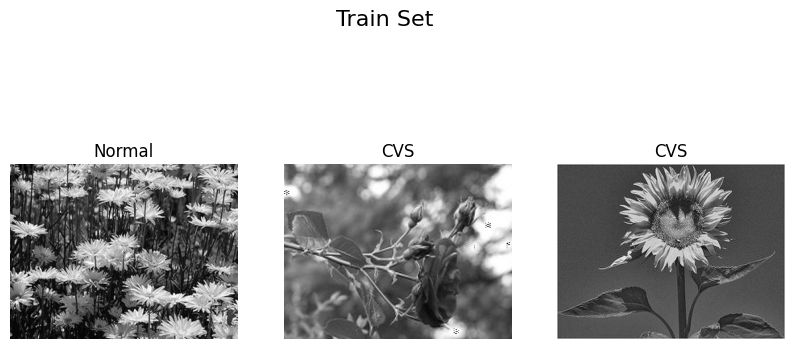

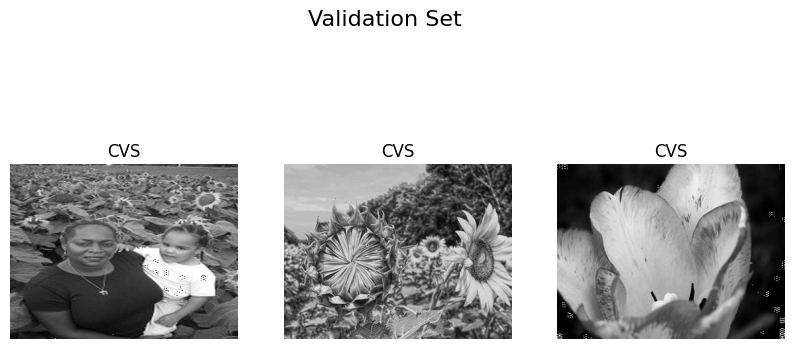

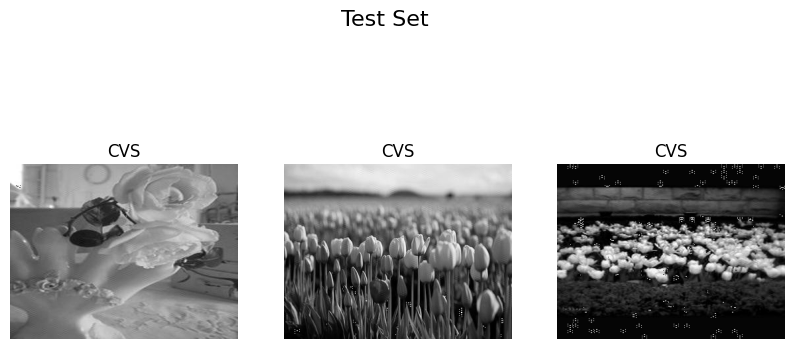

In [ ]:
import matplotlib.pyplot as plt

# Функция для отображения изображений
def plot_images_with_labels(generator, title):
    images, labels = next(generator)  # Получаем батч изображений и меток
    plt.figure(figsize=(10, 5))
    plt.suptitle(title, fontsize=16)
    
    for i in range(3):
        ax = plt.subplot(1, 3, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')  # Отображаем Y-компоненту
        label = 'CVS' if labels[i] == 0 else 'Normal'
        plt.title(label)
        plt.axis('off')
        
    plt.show()

# Отобразить примеры изображений из каждой секции
plot_images_with_labels(train_generator, "Train Set")
plot_images_with_labels(val_generator, "Validation Set")
plot_images_with_labels(test_generator, "Test Set")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

def create_model():
# Создание модели с большими фильтрами на начальных слоях
    model = Sequential([
        Input(shape=(264, 344, 1)),  # Входной слой с указанием формы данных (Y-компонента)
        
        Conv2D(16, (8, 8), activation='relu'),  # Первый сверточный слой с фильтрами 8x8
        MaxPooling2D((2, 2)),  # Пуллинг слой для снижения размерности
    
        Conv2D(32, (8, 8), activation='relu'),  # Следующий сверточный слой с фильтрами 8x8
        MaxPooling2D((2, 2)),
    
        Conv2D(64, (3, 3), activation='relu'),  # Переход на меньший фильтр для выявления более мелких деталей
        MaxPooling2D((2, 2)),
    
        Flatten(),  # Преобразуем выход из матрицы в вектор
    
        Dense(64, activation='relu'),  # Полносвязный слой для более сложных признаков
        Dropout(0.5),  # Dropout для предотвращения переобучения
    
        Dense(1, activation='sigmoid')  # Выходной слой для бинарной классификации
    ])
    
    # Компиляция модели
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Вывод информации о модели
    model.summary()
    return model

In [ ]:
# Количество шагов на одну эпоху для обучения и валидации
steps_per_epoch = train_generator.samples // batch_size
validation_steps = val_generator.samples // val_batch_size
print(f"Steps per epoch: {steps_per_epoch}")
print(f"validation_steps: {validation_steps}")

Steps per epoch: 8
validation_steps: 2


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Параметры обучения
epochs = 2  # Количество эпох

# Путь для сохранения модели
checkpoint_filepath  = '/kaggle/working/model_checkpoint.weights.h5'
model = create_model()

# Если модель уже существует, загружаем её, иначе создаем новую модель
if os.path.exists(checkpoint_filepath):
    print("Загрузка обученной модели...")
    model.load_weights(checkpoint_filepath)



# Колбэк для сохранения модели
checkpoint_callback = ModelCheckpoint(
    checkpoint_filepath,  # Путь для сохранения модели
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,  # Мы хотим минимизировать ошибку
    verbose=1  # Выводить информацию о процессе сохранения
)

# Обучение модели с использованием этого колбэка
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=val_generator,
    validation_steps=1,
    validation_batch_size=val_batch_size,
    validation_freq=1,
    # callbacks=[checkpoint_callback]  # Добавляем колбэк
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 257, 337, 16)   │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 168, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 121, 161, 32)   │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 60, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 58, 78, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 39, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 72384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,632,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,685,041 (17.87 MB)

 Trainable params: 4,685,041 (17.87 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 137s 17s/step - accuracy: 0.5067 - loss: 1.3135 - val_accuracy: 0.0667 - val_loss: 0.8160
Epoch 2/2


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.5499


In [ ]:
# Оценка модели на тестовом наборе
new_model = create_model()
test_loss, test_accuracy = new_model.evaluate(test_generator)
print(f"Test accuracy (new_model): {test_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy (trained): {test_accuracy * 100:.2f}%")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 257, 337, 16)   │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 168, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 121, 161, 32)   │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 60, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 58, 78, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 39, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 72384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     4,632,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,685,041 (17.87 MB)

 Trainable params: 4,685,041 (17.87 MB)

 Non-trainable params: 0 (0.00 B)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4667 - loss: 0.6933
Test accuracy (new_model): 46.67%
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3889 - loss: 0.7286
Test accuracy (trained): 54.17%
